In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

In [2]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [3]:
gen = ImageDataGenerator(rotation_range=60, width_shift_range=0.15, 
                         height_shift_range=0.15, shear_range=0.15, 
                         zoom_range=0.1, channel_shift_range=10., 
                         horizontal_flip=True, brightness_range=[0.7,1.5])

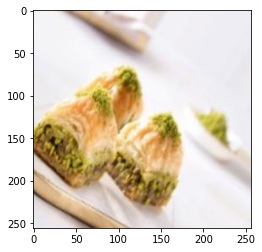

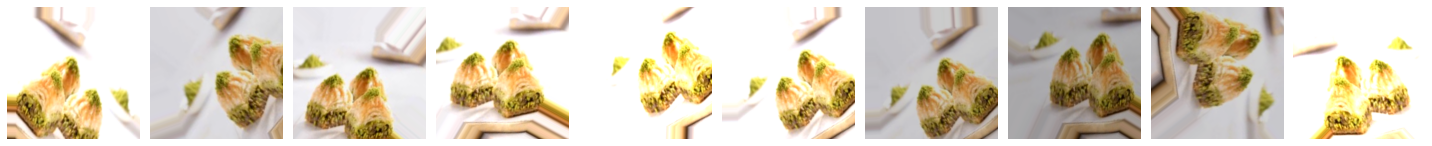

In [16]:
image_paths = []
list_of_class = []
for i in os.listdir('data/train'):
    chosen_images = os.listdir(f'data/train/{i}')
    for j in chosen_images:
        list_of_class.append(i)
        image_path = f'data/train/{i}/' + j
        image_paths.append(image_path)        
        images = np.expand_dims(plt.imread(image_path),0)


images = np.expand_dims(plt.imread(image_paths[6590]),0) 
plt.imshow(images[0])
aug_iter = gen.flow(images)
aug_images = [next(aug_iter)[0].astype(np.uint8) for r in range(10)]
plotImages(aug_images)

In [ ]:
m=0
for k in image_paths:
    images = np.expand_dims(plt.imread(k),0) 
    #plt.imshow(images[0])
    aug_iter = gen.flow(images)
    aug_images = [next(aug_iter)[0].astype(np.uint8) for r in range(5)]
    #plotImages(aug_images)
    aug_iter = gen.flow(images, save_to_dir=f'data2/train/{list_of_class[m]}', save_prefix=f'aug-image-{list_of_class[m]}', save_format='jpg')
    total=0
    for image in aug_iter:
        total += 1
        if total == 5:
            break
    print(m , ".  " ,list_of_class[m])
    m += 1
    